In [13]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from  sklearn.feature_extraction.text import CountVectorizer

from scipy import sparse
import pandas as pd
import numpy as np

import seaborn as sns


In [3]:
model = 'clean_embed_all-mpnet-base-v2.csv'
df = pd.read_csv('/global/project/hpcg1614_shared/ca/data/banking77/{}'.format(model))
df_orig = pd.read_csv('clean.csv')

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,category
0,0.033118,0.024241,-0.027198,0.012669,-0.027675,0.018258,0.000166,0.018616,-0.020171,-0.015402,...,-0.003783,0.021030,0.040517,-0.063602,0.059316,-0.015556,0.001022,-0.035402,-0.019583,card_arrival
1,0.025349,0.036361,-0.024998,0.023817,-0.024528,0.011564,0.016364,0.029498,-0.008534,-0.006400,...,-0.018929,0.015788,0.028341,-0.051970,0.030264,-0.003601,0.014045,-0.013700,-0.023940,card_arrival
2,0.041148,0.001923,-0.024474,0.065703,-0.050962,-0.030485,-0.025799,0.036423,-0.037173,-0.011324,...,0.005138,0.066294,0.047694,-0.083163,0.038658,-0.027191,-0.022017,-0.036791,-0.030673,card_arrival
3,-0.047038,0.064994,-0.016703,0.018665,0.024756,0.021976,0.029501,-0.046115,-0.023410,-0.021121,...,-0.018219,0.051667,0.067599,-0.037037,0.041919,-0.050325,0.024547,-0.039276,-0.041093,card_arrival
4,0.038647,0.050879,-0.009709,0.033243,0.007472,-0.012450,-0.006902,0.030302,-0.020504,0.025630,...,-0.024887,0.039557,0.045903,-0.038753,0.054652,0.024629,-0.015520,0.061558,-0.020172,card_arrival


In [4]:
df_orig.head()

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [6]:
list_labels = df_orig['category'].unique()

In [8]:
list_labels[0]

'card_arrival'

In [11]:
list_cleanLabels = [sub.replace('_',' ') for sub in list_labels]

In [15]:
list_cleanLabels[0:5]

['card arrival',
 'card linking',
 'exchange rate',
 'card payment wrong exchange rate',
 'extra charge on statement']

In [20]:
vectorizer = CountVectorizer().fit_transform(list_cleanLabels)

In [31]:
vectors = vectorizer.toarray()
vectors[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [22]:
csim = cosine_similarity(vectors)
csim

array([[1. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [0.5, 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [23]:
def cosine_sim_vectors(vec1,vec2):
    vec1 = vec1.reshape(1,-1)
    vec2 = vec2.reshape(1,-1)
    
    return cosine_similarity(vec1,vec2)[0][0]

In [27]:
cosine_sim_vectors(vectors[0],vectors[3])

0.3162277660168379

In [29]:
A =  vectors
A_sparse = sparse.csr_matrix(A)

sim  = cosine_similarity(A_sparse)
dist = euclidean_distances(A_sparse)

In [32]:
A_sparse

<77x110 sparse matrix of type '<class 'numpy.longlong'>'
	with 252 stored elements in Compressed Sparse Row format>

In [30]:
print(sim[0,3])

0.3162277660168379


In [85]:
res=pd.DataFrame(columns=list_cleanLabels, index=list_cleanLabels)
for i in range(len(list_cleanLabels)):
    for j in range(len(list_cleanLabels)):
        res.iloc[i,j]= round(sim[i,j],4)

In [86]:
res = res.fillna(0)

In [87]:
res.to_csv('label_sim_res.csv', index=False)

In [92]:
res.head()

,card arrival,card linking,exchange rate,card payment wrong exchange rate,extra charge on statement,pending cash withdrawal,fiat currency support,card delivery estimate,automatic top up,card not working,...,balance not updated after bank transfer,cash withdrawal not recognised,exchange charge,top up by card charge,activate my card,cash withdrawal charge,card about to expire,apple pay or google pay,verify my identity,country support
card arrival,1.0000,0.5000,0.0000,0.3162,0.0,0.0,0.0,0.4082,0.0,0.4082,...,0.0,0.0,0.0000,0.3162,0.4082,0.0000,0.3536,0.0,0.0,0.0
card linking,0.5000,1.0000,0.0000,0.3162,0.0,0.0,0.0,0.4082,0.0,0.4082,...,0.0,0.0,0.0000,0.3162,0.4082,0.0000,0.3536,0.0,0.0,0.0
exchange rate,0.0000,0.0000,1.0000,0.6325,0.0,0.0,0.0,0.0000,0.0,0.0000,...,0.0,0.0,0.5000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0
card payment wrong exchange rate,0.3162,0.3162,0.6325,1.0000,0.0,0.0,0.0,0.2582,0.0,0.2582,...,0.0,0.0,0.3162,0.2000,0.2582,0.0000,0.2236,0.0,0.0,0.0
extra charge on statement,0.0000,0.0000,0.0000,0.0000,1.0,0.0,0.0,0.0000,0.0,0.0000,...,0.0,0.0,0.3536,0.2236,0.0000,0.2887,0.0000,0.0,0.0,0.0


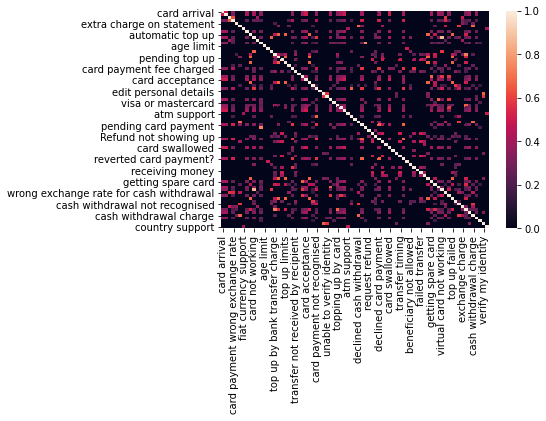

In [88]:
ax=sns.heatmap(res)